Jacob Ballard  
Colby Kinser  
DSC 305A S22  
Lab 2: Wine Reviews  

# Summary

In this lab a csv containing data on wines from different vineyards across the globe was analyzed.  The dataset was cleaned of extraneous columns and rows.  Various operations were performed on the dataset to determine the existence of any vineyards in Kentucky.  The most expensive wine in the dataset was found (Château les Ormes Sorbet 2013 Médoc).  Individual states wines in the US were aggregated and examined.  Price versus points on Argentinian wines were graphed.  Finally, the tasters were graphed in a histogram based on their contributions.

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**1. Use pandas to import the [Wine Reviews dataset](https://www.kaggle.com/zynicide/wine-reviews) from Kaggle.**

In [31]:
# Read in the data set
df = pd.read_csv('winemag-data-130k-v2.csv')
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


**2. Note that some fields (columns) have missing data. List, in order, the 3 fields with the most missing data (as a percentage of total data).** 

In [32]:
x = df.count()
missing = (129971 - x)/129971
missing.sort_values()

Unnamed: 0               0.000000
description              0.000000
points                   0.000000
title                    0.000000
winery                   0.000000
variety                  0.000008
country                  0.000485
province                 0.000485
price                    0.069215
region_1                 0.163475
taster_name              0.201922
taster_twitter_handle    0.240154
designation              0.288257
region_2                 0.611367
dtype: float64

The region_2 (61.1%), designation (28.8%), and taster_twitter_handle (24.0%) fields have the most missing data.

**3. Is *price* missing for any record (row)? What abour *points*?**

In [33]:
x = df.count()
missing = (129971 - x)/129971
missing

Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

The price field is missing 6.9% of its records.  The points field is missing no data.

**4. List all the values that occur in the country column, along with the number of rows that corresponds to each country. Sort the resulting aggregated dataset in order of decreasing number.**

In [34]:
df['country'].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

**5. Are any wines associated with province Kentucky in the USA? List the wineries with province Kentucky. Separately, list all the varieties grown in Kentucky.** *(If you cannot locate any wines produced in Kentucky, then choose Idaho for this question instead.)*

In [35]:
df[df['province'] == 'Kentucky']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
28589,28589,US,"Black fruit, pepper and spice lead this likeab...",Estate,83,35.0,Kentucky,Kentucky,NaN,Susan Kostrzewa,@suskostrzewa,Elk Creek Vineyards 2007 Estate Cabernet Franc...,Cabernet Franc,Elk Creek Vineyards


There is one wine associated with Kentucky in the USA called Elk Creek Vineyards.  This winery grows the Cabernet Franc	variety.

**6. Can you identify any other problems involving the data set, such as duplicate entries or irrelevant columns (features)?  Clean the dataset by addressing each issue that you discover.**

The 'Unamed: 0' column is redundant and is removed in the following step.  

In [36]:
df.pop('Unnamed: 0')
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [37]:
df = df[df.duplicated() == False]
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [38]:
(129971 - 119988)/129971

0.07680944210631603

7.68% of the entries were exact duplicates and therefore only one copy of each duplicate was kept.

**7. Are there any wines that are not exact duplicates, but nevertheless have exactly the same description? If so, is there an apparent explanation for this? For example, maybe it is the same wine?**

In [39]:
df[df.duplicated(['description'])]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
19269,Italy,This zesty red has pretty aromas that suggest ...,NaN,87,30.0,Tuscany,Rosso di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Carpineto 2014 Rosso di Montalcino,Sangiovese,Carpineto
22963,Italy,"Easygoing and enjoyable, this has aromas of ma...",NaN,86,NaN,Central Italy,Montepulciano d'Abruzzo,NaN,Kerin O’Keefe,@kerinokeefe,Quattro Mani 2015 Montepulciano d'Abruzzo,Montepulciano,Quattro Mani
25182,US,"Cigar box, café au lait, and dried tobacco aro...",Estate,88,30.0,Washington,Red Mountain,Columbia Valley,Sean P. Sullivan,@wawinereport,Ambassador Vineyard 2013 Estate Syrah (Red Mou...,Syrah,Ambassador Vineyard
26490,Italy,This opens with subtle aromas of wild flower a...,Vigne di Sande,87,NaN,Veneto,Soave,NaN,Kerin O’Keefe,@kerinokeefe,Villa Canestrari 2016 Vigne di Sande (Soave),Garganega,Villa Canestrari
26761,Austria,Lifted pear-drop aromas are accompanied by the...,Per Due,90,15.0,Kremstal,NaN,NaN,Anne Krebiehl MW,@AnneInVino,Hermann Moser 2015 Per Due Grüner Veltliner (K...,Grüner Veltliner,Hermann Moser
31584,Italy,"Vibrant and spicy, this savory red delivers ar...",Costera,90,18.0,Sicily & Sardinia,Cannonau di Sardegna,NaN,Kerin O’Keefe,@kerinokeefe,Argiolas 2013 Costera (Cannonau di Sardegna),Red Blend,Argiolas
33110,Argentina,"Stalky aromas suggest hay and green herbs, wit...",Finca La Niña,84,10.0,Mendoza Province,Mendoza,NaN,Michael Schachner,@wineschach,Don Cristobal 1492 2010 Finca La Niña Cabernet...,Cabernet Sauvignon,Don Cristobal 1492
33932,Italy,Subtle aromas of acacia flower and a whiff of ...,Monfrigio,86,20.0,Piedmont,Roero,NaN,Kerin O’Keefe,@kerinokeefe,Dezzani 2015 Monfrigio (Roero),Arneis,Dezzani
39950,US,This wine shows some of the less appealing asp...,Hargrave Vineyard,82,14.0,New York,North Fork of Long Island,Long Island,Joe Czerwinski,@JoeCz,Castello di Borghese 1998 Hargrave Vineyard C...,Chardonnay,Castello di Borghese
43149,US,"Hugely delicious, just a joy to drink. So soft...",NaN,93,66.0,California,Napa County-Sonoma County,Napa-Sonoma,NaN,NaN,Pride Mountain 2008 Cabernet Sauvignon (Napa C...,Cabernet Sauvignon,Pride Mountain


Yes there are wines with the same description that are not exact duplicates.  I examine some of these duplicates below:

In [40]:
for i in range(65):
    print(df[df['description'] == df[df.duplicated(['description'])].iloc[i]['description']])

      country                                        description designation  \
4230    Italy  This zesty red has pretty aromas that suggest ...         NaN   
19269   Italy  This zesty red has pretty aromas that suggest ...         NaN   

       points  price province             region_1 region_2    taster_name  \
4230       88   30.0  Tuscany  Rosso di Montalcino      NaN  Kerin O’Keefe   
19269      87   30.0  Tuscany  Rosso di Montalcino      NaN  Kerin O’Keefe   

      taster_twitter_handle                                title     variety  \
4230           @kerinokeefe    Ridolfi 2014  Rosso di Montalcino  Sangiovese   
19269          @kerinokeefe  Carpineto 2014  Rosso di Montalcino  Sangiovese   

          winery  
4230     Ridolfi  
19269  Carpineto  
      country                                        description designation  \
2159    Italy  Easygoing and enjoyable, this has aromas of ma...         NaN   
22963   Italy  Easygoing and enjoyable, this has aromas of ma...  

      country                                        description  \
12141      US  Seductively tart in lemon pith, cranberry and ...   
51822      US  Seductively tart in lemon pith, cranberry and ...   

                              designation  points  price    province  \
12141              Woods Vineyard Rosé of      91   29.0  California   
51822  800 Vines Jenna's Vineyard Rosé of      89   25.0  California   

                   region_1 region_2     taster_name taster_twitter_handle  \
12141  Russian River Valley   Sonoma  Virginie Boone               @vboone   
51822  Russian River Valley   Sonoma  Virginie Boone               @vboone   

                                                   title     variety  \
12141  Ousterhout 2014 Woods Vineyard Rosé of Pinot N...  Pinot Noir   
51822  Ousterhout 2014 800 Vines Jenna's Vineyard Ros...  Pinot Noir   

           winery  
12141  Ousterhout  
51822  Ousterhout  
      country                                        description  

      country                                        description designation  \
36475   Italy  Green bell pepper, red currant and dark spice ...         NaN   
87797   Italy  Green bell pepper, red currant and dark spice ...         NaN   

       points  price            province region_1 region_2    taster_name  \
36475      85    NaN  Northeastern Italy   Collio      NaN  Kerin O’Keefe   
87797      90    NaN  Northeastern Italy   Collio      NaN  Kerin O’Keefe   

      taster_twitter_handle                                title  \
36475          @kerinokeefe  Ca'Ronesca 2013 Pinot Nero (Collio)   
87797          @kerinokeefe  Zorzon 2013 Cabernet Franc (Collio)   

              variety      winery  
36475      Pinot Nero  Ca'Ronesca  
87797  Cabernet Franc      Zorzon  
      country                                        description  \
52601   Italy  This offers aromas and flavors suggesting unri...   
93839   Italy  This offers aromas and flavors suggesting unri...   

         

       country                                        description designation  \
53296    Italy  Ripe plum, game, truffle, leather and menthol ...         NaN   
126930   Italy  Ripe plum, game, truffle, leather and menthol ...         NaN   

        points  price province                region_1 region_2  \
53296       88   72.0  Tuscany  Brunello di Montalcino      NaN   
126930      87   40.0  Tuscany  Brunello di Montalcino      NaN   

          taster_name taster_twitter_handle  \
53296   Kerin O’Keefe          @kerinokeefe   
126930  Kerin O’Keefe          @kerinokeefe   

                                             title     variety         winery  
53296     La Mannella 2011  Brunello di Montalcino  Sangiovese    La Mannella  
126930  Poggiarellino 2011  Brunello di Montalcino  Sangiovese  Poggiarellino  
       country                                        description  \
93638    Italy  Classically structured, this still needs to op...   
128668   Italy  Classically struct

IndexError: single positional indexer is out-of-bounds

A closer look at wines with the same description shows that some of these entries have different values for fields like 'points' and 'price'.  Some share a price but have subtle differences in the region or variety.  These differences are also sometimes just blank fields that have not been filled in.  These discrepancies all seem to be human error but the entries themselves still provide value to the data set and will therefore be left alone.

**8. What is the highest price for any wine? How many different wines have that price (there could be ties)? Give the designation of at least one wine with highest price, along with the vineyard and variety.** 

In [42]:
# df.sort_values('price', ascending= False)
df[df['price'] == df['price'].max()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
80290,France,This ripe wine shows plenty of blackberry frui...,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet


Château les Ormes Sorbet 2013 Médoc was the highest-priced wine at 3300.0 it is a Bordeaux-style Red Blend from Château les Ormes Sorbet vineyard.

**9. List all countries along with the average price and the average points of all wines associated with that country.  Sort the list by price and (in case there are ties), next by points, and finally alphabetically by country name.** 

In [43]:
groups = df.groupby('country')

#In descending order by price, then points (tiebreaker), then country (tiebreaker).
groups.mean().sort_values(['price', 'points', 'country'], ascending = False) 

,points,price
country,,
Switzerland,88.500000,72.833333
England,91.746032,52.677966
Germany,89.895582,43.460789
Hungary,89.294574,42.234375
France,88.866752,41.994105
Italy,88.576198,39.928286
US,88.555384,36.697520
Canada,89.309735,35.776786
Australia,88.561220,35.686491


Switzerland had the highest price for wines by over a 50% more than the next most expensive wine. 

**10. List all of the states (province) that occur in the US that occur in the dataset. List the states in alphabetical order. For each state, list the following statistics for points and price: number of rows for that state that have a value (sample size $N$), minimum value, maximum value, mean (average), median, standard deviation.** 

In [44]:
gr = df[df['country'] == 'US'].groupby('province')

gr.agg({'points' : ['count', 'min', 'max', 'mean', 'median', 'std'],
       'price' : ['count', 'min', 'max', 'mean', 'median', 'std']})

points                                       price        \
                   count min  max       mean median       std  count   min   
province                                                                     
America               84  80   94  86.357143   86.0  2.418019     84   6.0   
Arizona               39  82   88  84.948718   85.0  1.503482     38  11.0   
California         33656  80  100  88.618047   89.0  3.306827  33526   4.0   
Colorado              62  80   91  86.032258   86.0  1.966671     62  12.0   
Connecticut            3  84   84  84.000000   84.0  0.000000      3  11.0   
Hawaii                 1  87   87  87.000000   87.0       NaN      1  28.0   
Idaho                179  80   91  86.469274   87.0  2.086044    177   6.0   
Illinois               5  83   86  84.400000   84.0  1.140175      5  26.0   
Iowa                   4  81   84  83.000000   83.5  1.414214      4  13.0   
Kentucky               1  83   83  83.000000   83.0       NaN      1  35.0   
Massachusetts          6  83   89  84.833333   84.5  2.228602      6  15.0   
Michigan             105  82   91  86.095238   86.0  1.958825    103  13.0   
Missouri              33  80   86  83.333333   83.0  1.726026     33   7.0   
Nevada                 3  83   85  84.000000   84.0  1.000000      3  22.0   
New Jersey             8  82   87  84.000000   83.0  1.927248      8  13.0   
New Mexico            44  81   88  83.909091   84.0  1.443803     44  10.0   
New York            2456  80   94  87.120114   87.0  2.284952   2444   7.0   
North Carolina        22  81   90  84.545455   84.5  2.197992     22  10.0   
Ohio                  10  80   87  83.900000   84.0  1.852926     10  11.0   
Oregon              4929  80   99  89.053155   89.0  2.851082   4917   5.0   
Pennsylvania          17  80   91  84.529412   85.0  2.348341     17  13.0   
Rhode Island           1  90   90  90.000000   90.0       NaN      1  25.0   
Texas                 90  80   89  85.155556   85.0  2.016288     89   8.0   
Vermont                2  84   85  84.500000   84.5  0.707107      2  25.0   
Virginia             725  80   92  85.565517   86.0  2.120063    718  10.0   
Washington          7965  80  100  88.966353   89.0  2.698638   7913   6.0   
Washington-Oregon      7  88   90  88.428571   88.0  0.786796      7   9.0   

                                                        
                      max       mean median        std  
province                                                
America              75.0  20.321429   17.0  12.111093  
Arizona              54.0  29.052632   29.0  11.330293  
California         2013.0  39.171658   33.0  30.761174  
Colorado            100.0  33.774194   30.0  17.063449  
Connecticut          20.0  15.333333   15.0   4.509250  
Hawaii               28.0  28.000000   28.0        NaN  
Idaho                55.0  20.468927   18.0   9.147180  
Illinois             40.0  32.400000   32.0   4.979960  
Iowa                 20.0  15.500000   14.5   3.316625  
Kentucky             35.0  35.000000   35.0        NaN  
Massachusetts        36.0  22.333333   21.0   8.041559  
Michigan            250.0  32.495146   25.0  27.715952  
Missouri             40.0  17.333333   15.0   9.339656  
Nevada               75.0  43.000000   32.0  28.160256  
New Jersey           36.0  25.500000   25.0   9.365591  
New Mexico           38.0  22.704545   20.5   7.620595  
New York            125.0  22.785188   20.0  10.765088  
North Carolina       50.0  20.954545   18.0   8.403385  
Ohio                 17.0  13.800000   15.0   2.097618  
Oregon              275.0  36.573317   30.0  20.363443  
Pennsylvania         46.0  23.647059   22.0   9.027328  
Rhode Island         25.0  25.000000   25.0        NaN  
Texas                80.0  25.629213   23.0  10.853761  
Vermont              45.0  35.000000   35.0  14.142136  
Virginia            100.0  26.863510   25.0  10.115830  
Washington          240.0  32.577657   29.0  18.751254  
Washington-Oregon    30.

**11. Use Matplotlib or Seaborn to construct a scatter plot of the price of Argentine wines and the points assigned to each wine in the review.** 

*Use `price` as your $X$ axis and `points` as your $Y$ axis. Be sure to label your axes and your graph.*

Text(0.5, 1.0, 'Price vs. Points for Argentinian Wines')

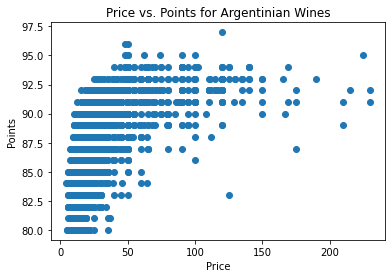

In [45]:
argentina = df[df['country'] == 'Argentina']
argentina

x = argentina['price'] # Get price points
y = argentina['points'] # Get points points
f, a = plt.subplots() # New graph
a.scatter(x,y) #Make it a scatter

a.set_ylabel("Points")
a.set_xlabel("Price")
a.set_title("Price vs. Points for Argentinian Wines")

**12. Construct an effective data visualization showing the relative contribution of the reviewers ("tasters"). The chart should show the individual contribution of the top nine reviewers, with all other reviewers aggregated as Other.**

*Note that I am leaving it up to you to consider the most effective way to present your data. Before you do this, I encourage you to read the article: Jeffrey D. Camm, Michael J. Fry, Jeffrey Shaffer (2017) A Practitioner’s Guide to Best Practices in Data Visualization. INFORMS Journal on Applied Analytics 47(6):473-488. https://doi.org/10.1287/inte.2017.0916 (posted to Moodle).*

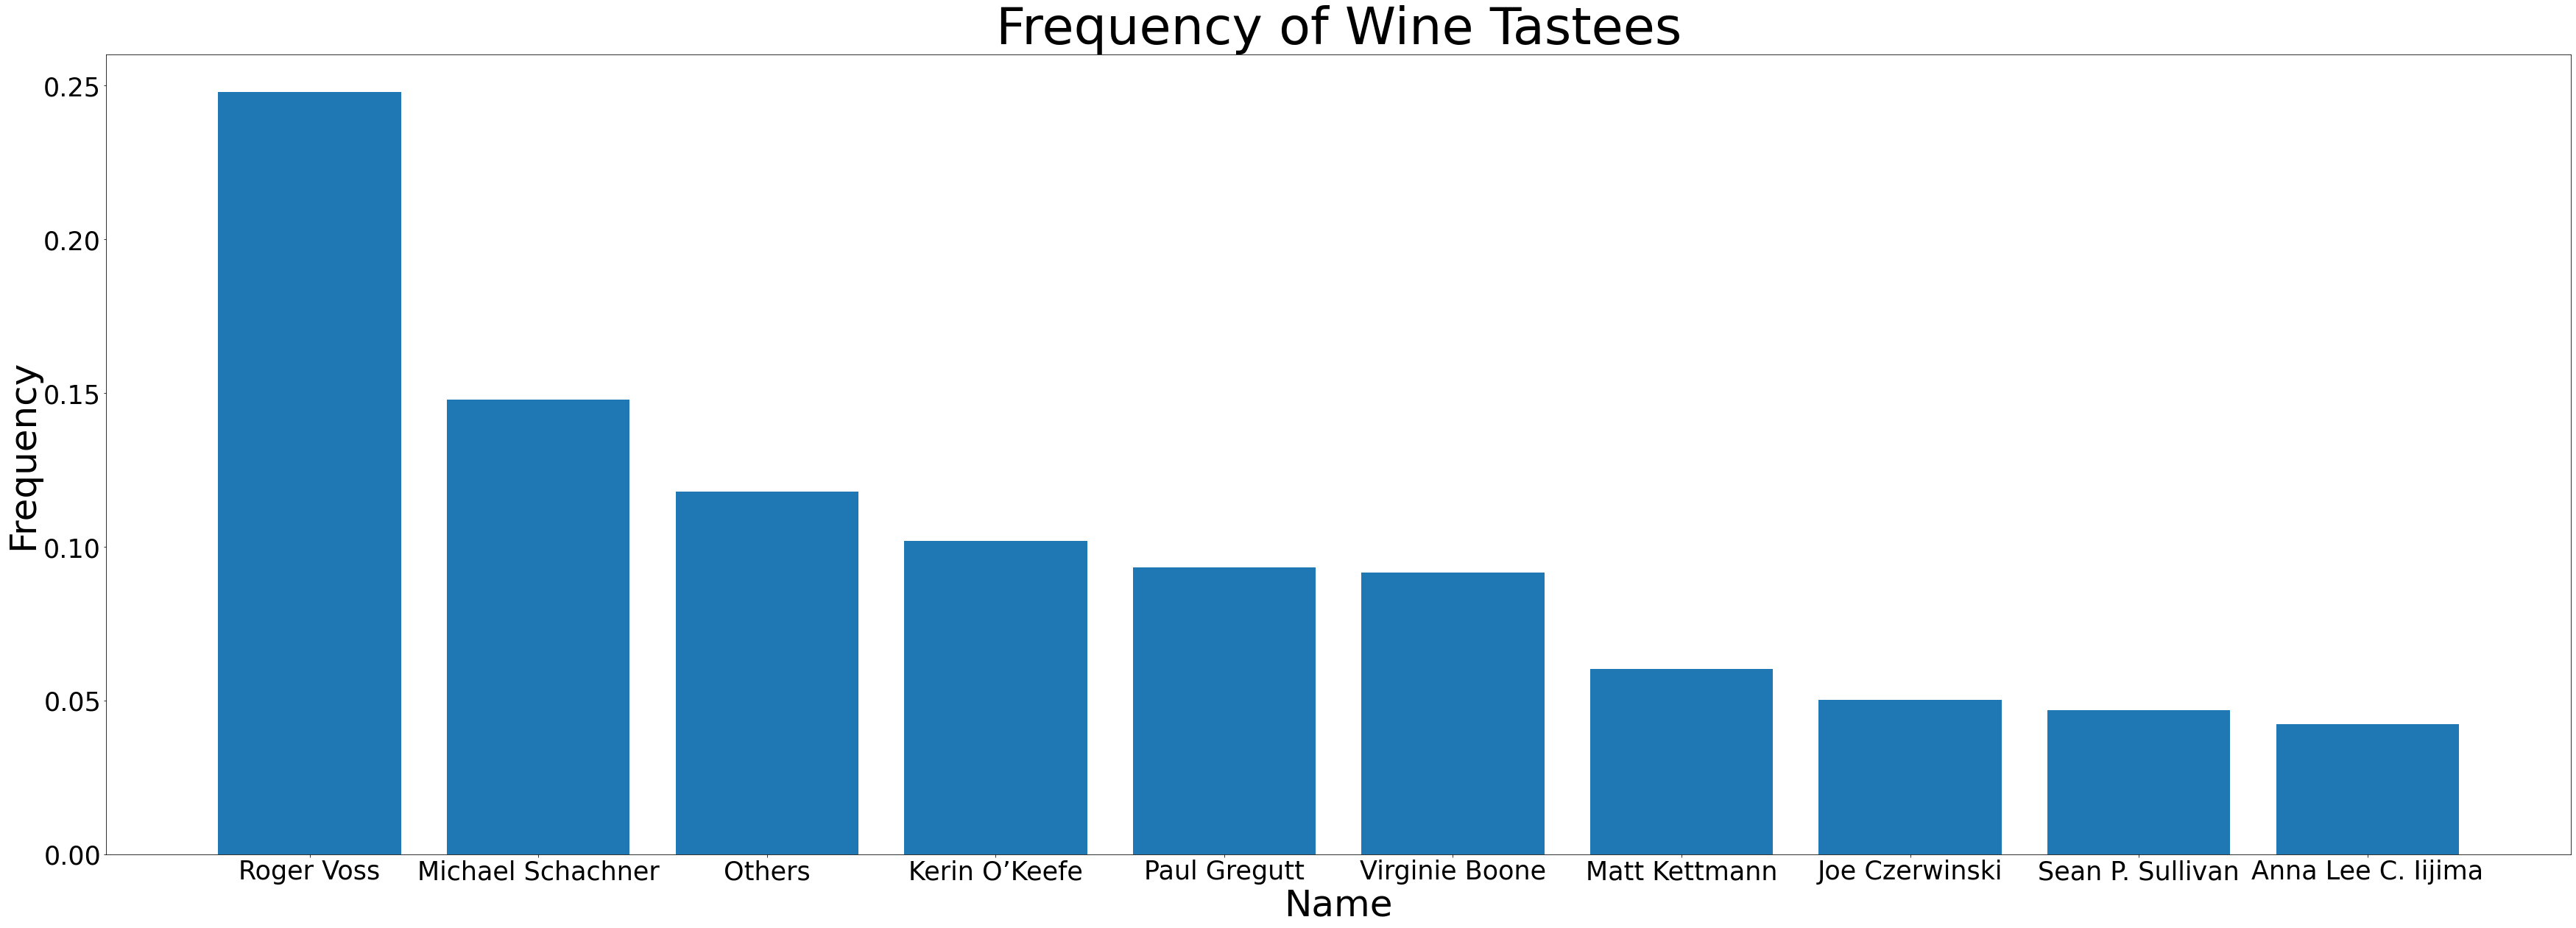

In [46]:
tasters = df.groupby('taster_name')

# Get the top contributing tasters
top = tasters['description'].count().sort_values(ascending = False)

#The top 9 are on the left side of the array, sum the rest and make it a new field.
top['Others'] = np.sum(top[9:])

#Put 'Others' in the top 10.
top = top.sort_values(ascending = False)

#Top 10 are now in place so we're good to get rid of everything else
top = top[0:10]

# Make plot
f, a = plt.subplots()

# .bar was working better than .hist so I just went with it.
a.bar(top.index, top.values/top.values.sum())

a.set_title("Frequency of Wine Tastees", fontsize = 70)
a.set_ylabel("Frequency", fontsize = 50)
a.set_xlabel("Name", fontsize = 50)

# Colby sent me this code today because I was having a hard time 
# getting the ticklabels sized correctly.
for label in (a.get_xticklabels() + a.get_yticklabels()):
    label.set_fontsize(35)
f.set_figwidth(60)
f.set_figheight(20)


A histogram was used because we are looking at the relative contributions of the top 9 tasters and everyone else and a histogram visualizes this appropriately.

**Discussion. Suppose you wanted to build a predictive model to predict the *variety* and *points* assigned to the wine based only on the words in the *description*. Briefly describe how you would go about this using knowledge that you already have from DSC 205 or other courses.** 

Based on the frequency of a descriptive word used in a wine's review, their variety and points may be correlated.  I would build a model that looked at the frequency of words in the description and the respective variety and points associated with these descriptors.

## Conclusion

This lab further familiarized me with Pandas and NumPy and working with a large dataset.  I also learned some basics in data visualization using Python and MatPlotLib.  

## Acknowledgements

Thank you to my lab partner Colby Kinser!

<ul><li><a href>https://pythonexamples.org/pandas-dataframe-delete-column/</li>
<li><a href>https://www.statology.org/pandas-find-duplicates/</li>
<li><a href>https://www.w3schools.com/python/matplotlib_labels.asp</li>
<li><a href>https://www.statology.org/change-font-size-matplotlib/</li>
<li><a href>https://www.geeksforgeeks.org/how-to-change-the-size-of-axis-labels-in-matplotlib/</li>
</ul>